In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier



In [2]:
df = pd.read_csv(r"C:\Users\pardh\PycharmProjects\pythonProject\diabetes_prediction_dataset.csv")

In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


In [6]:
df.shape

(100000, 9)

In [7]:
#Check for null values in the dataset
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [8]:
#Checking the number of unique values
df.select_dtypes(include='int64').nunique()


hypertension            2
heart_disease           2
blood_glucose_level    18
diabetes                2
dtype: int64

In [9]:
#check duplicate values
df.duplicated().sum()

3854

In [10]:
#drop the duplicated values
df = df.drop_duplicates()

In [11]:
df.shape

(96146, 9)

In [12]:
column_names = df.columns.tolist()
print("Column Names:")
print(column_names)

Column Names:
['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']


Data Visualization

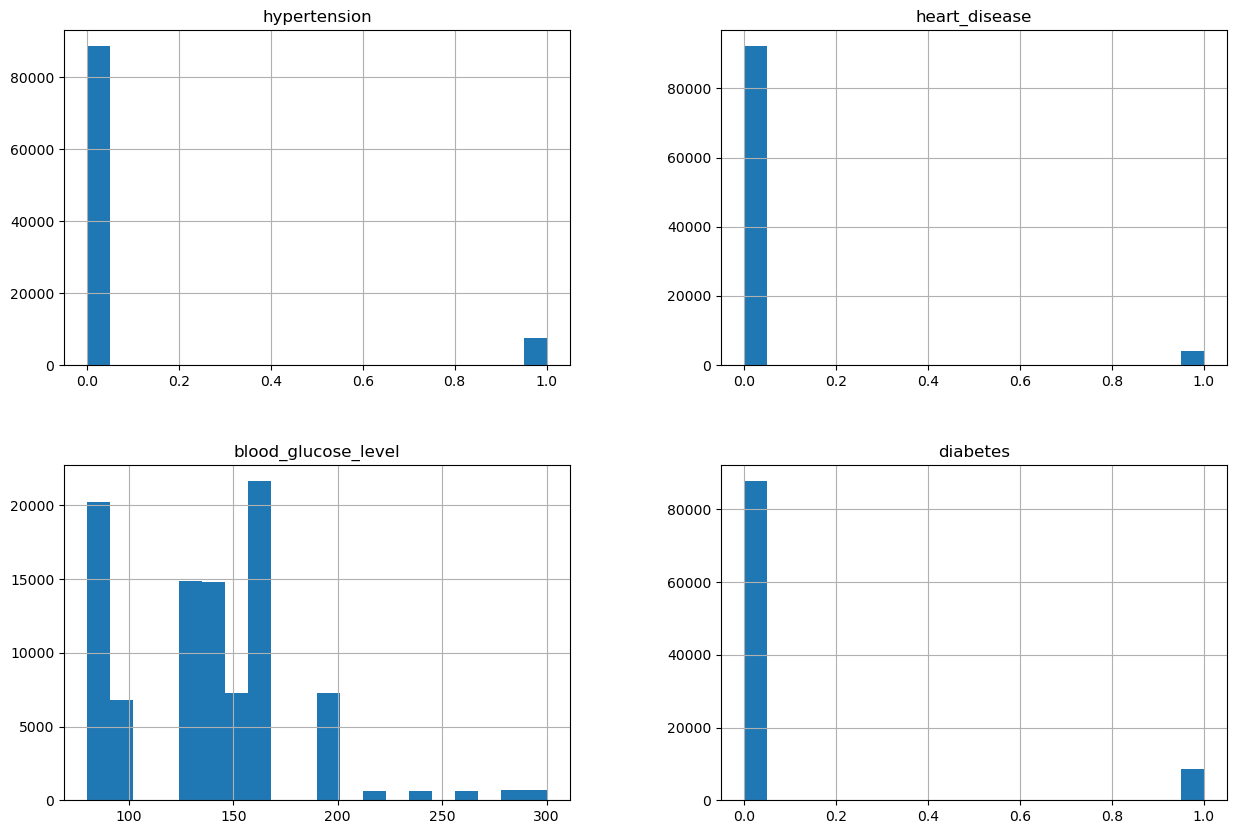

In [15]:
numeric_columns = df.select_dtypes(include=['int64'])
numeric_columns.hist(bins=20, figsize=(15, 10))
plt.show()

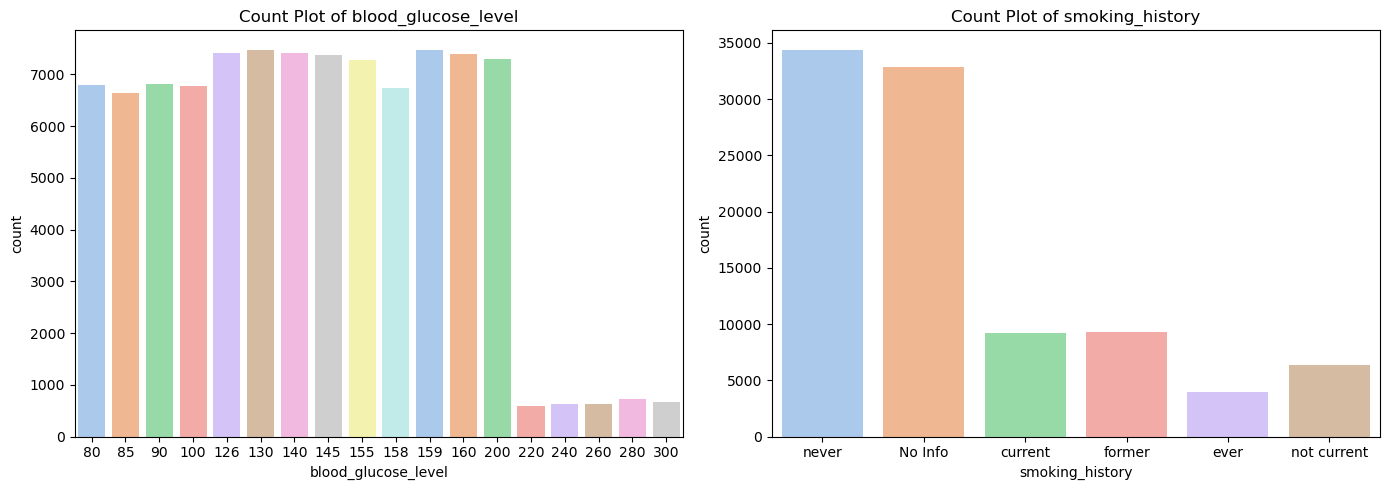

In [16]:
# Combined side-by-side count plot for categorical variables
categorical_columns = ['blood_glucose_level','smoking_history',]
fig, axes = plt.subplots(nrows=1, ncols=len(categorical_columns), figsize=(14, 5))

for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, data=df, ax=axes[i], palette='pastel')
    axes[i].set_title(f'Count Plot of {col}')

plt.tight_layout()
plt.show()

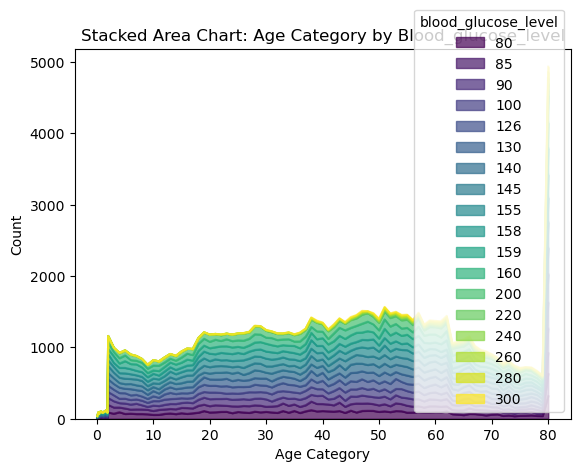

In [17]:
#Stacked Area Chart .
crosstab = pd.crosstab(df['age'],df['blood_glucose_level'])
crosstab.plot(kind='area', colormap='viridis', alpha=0.7, stacked=True)
plt.title('Stacked Area Chart: Age Category by Blood_glucose_level')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.show()

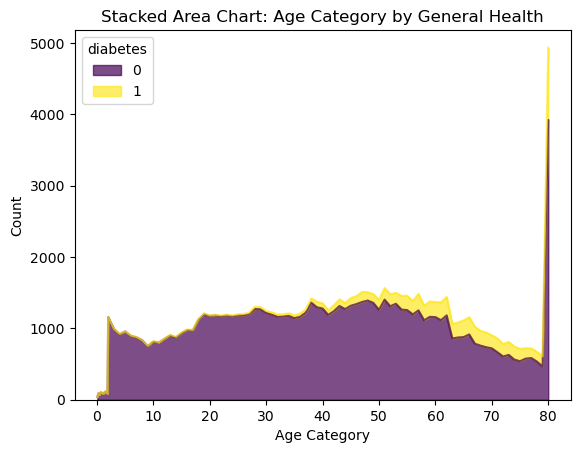

In [18]:
#Stacked Area Chart .
crosstab = pd.crosstab(df['age'],df['diabetes'])
crosstab.plot(kind='area', colormap='viridis', alpha=0.7, stacked=True)
plt.title('Stacked Area Chart: Age Category by General Health')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.show()

In [19]:
# Create a copy of the DataFrame to avoid modifying the original
df_encoded = df.copy()

# Create a label encoder object
label_encoder = LabelEncoder()

# Iterate through each object column and encode its values
for column in df_encoded.select_dtypes(include='object'):
    df_encoded[column] = label_encoder.fit_transform(df_encoded[column])

# Now, df_encoded contains the label-encoded categorical columns
df_encoded.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


<Axes: >

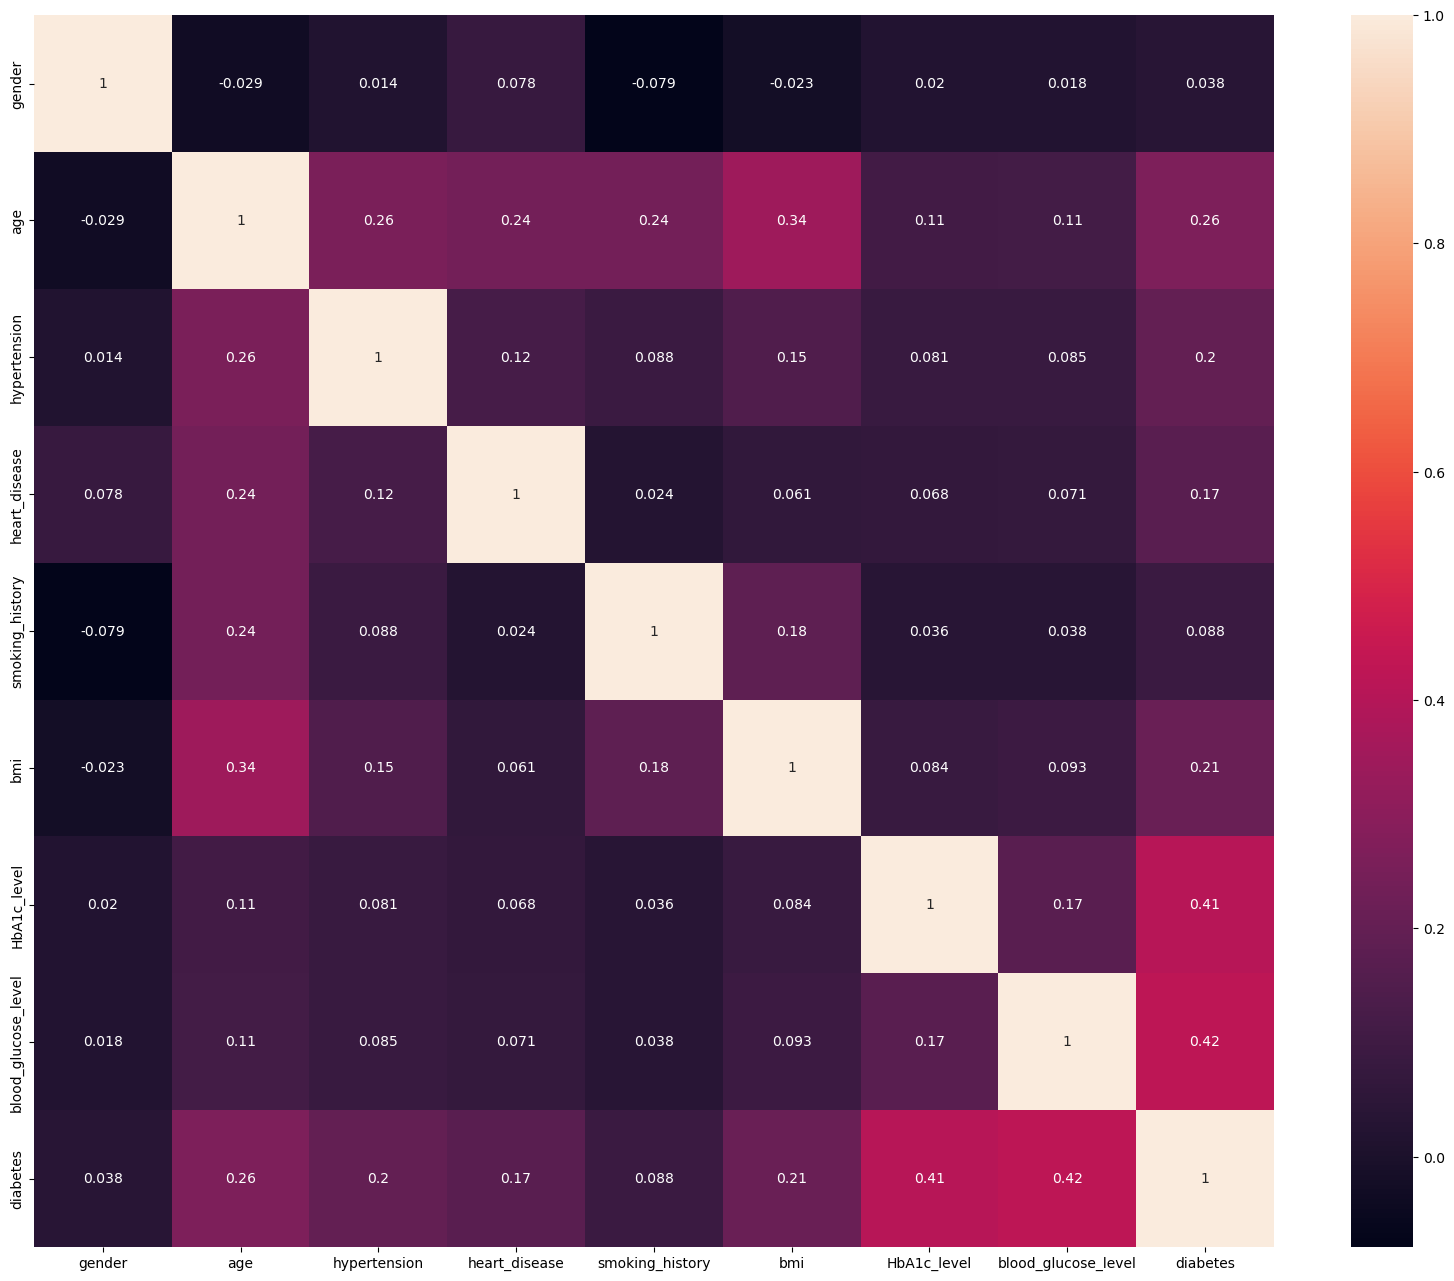

In [20]:
plt.figure(figsize=(20, 16))
sns.heatmap(df_encoded.corr(), fmt='.2g', annot=True)

In [21]:
# df['gender'] = (df['gender'] == 'Male').astype(int)  # handling the binary categorical variable
# df['smoking_history'] = (df['smoking_history'] == 'current').astype(int)  # handling the binary categorical variable

X = df_encoded.drop(columns=['diabetes'])  # Features
y = df_encoded['diabetes'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

df_encoded.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [22]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the test set
lr_predictions = lr_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, lr_predictions)
mae = mean_absolute_error(y_test, lr_predictions)
print(f"Linear Regression Mean Squared Error: {mse:.2f}")
print(f"Linear Regression Mean Absolute Error: {mae:.2f}")

Linear Regression Mean Squared Error: 0.05
Linear Regression Mean Absolute Error: 0.16


In [23]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
logistic_predictions = logistic_model.predict(X_test)

# Calculate AUC
logistic_auc = roc_auc_score(y_test, logistic_predictions)

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, logistic_predictions)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, logistic_predictions)
print(f"Logistic Regression Accuracy: {accuracy:.2f}")
print("Logistic Regression Classification Report:")
print(classification_report(y_test, logistic_predictions))


Logistic Regression Accuracy: 0.95
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     17509
           1       0.81      0.59      0.68      1721

    accuracy                           0.95     19230
   macro avg       0.88      0.79      0.83     19230
weighted avg       0.95      0.95      0.95     19230



c:\Users\pardh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
# Best Parameters for Decision Tree Classifier
best_params = {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}

# Create and train the Decision Tree Classifier with the specified parameters
dt_classifier = DecisionTreeClassifier(criterion=best_params['criterion'],
                                       max_depth=best_params['max_depth'],
                                       min_samples_leaf=best_params['min_samples_leaf'],
                                       min_samples_split=best_params['min_samples_split'],
                                       random_state=0)

dt_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)

print("Decision Tree Model Accuracy:", accuracy_dt)
print("Decision Tree Classification Report:\n", report_dt)

Decision Tree Model Accuracy: 0.9568902756110245
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98     17509
           1       0.78      0.73      0.75      1721

    accuracy                           0.96     19230
   macro avg       0.88      0.85      0.86     19230
weighted avg       0.96      0.96      0.96     19230



In [25]:
# Create and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=0, max_features='sqrt', n_estimators=100, max_depth=10)
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Model Accuracy:", accuracy)
print("Classification Report:\n", report)

Model Accuracy: 0.9705148205928237
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     17509
           1       1.00      0.67      0.80      1721

    accuracy                           0.97     19230
   macro avg       0.98      0.84      0.89     19230
weighted avg       0.97      0.97      0.97     19230



In [26]:
# Create a pipeline with the KNN classifier
knn_pipeline = make_pipeline(KNeighborsClassifier())

# Define the parameter grid for GridSearchCV
param_grid = {
    'kneighborsclassifier__n_neighbors': [3, 5, 7],  # You can add more values to test
    'kneighborsclassifier__weights': ['uniform', 'distance'],
}

# Create the GridSearchCV object
grid_search = GridSearchCV(knn_pipeline, param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Predict on the test set using the best estimator
y_pred = best_estimator.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Model Accuracy:", accuracy)
print("Classification Report:\n", report)

Best Parameters: {'kneighborsclassifier__n_neighbors': 7, 'kneighborsclassifier__weights': 'uniform'}
Model Accuracy: 0.9516900676027041
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     17509
           1       0.90      0.52      0.66      1721

    accuracy                           0.95     19230
   macro avg       0.93      0.76      0.82     19230
weighted avg       0.95      0.95      0.95     19230



In [27]:
# Create and train the XGBoost Classifier
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier(random_state=42,max_features='sqrt', n_estimators=100, max_depth=10)
xgb_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("XGBoost Model Accuracy:", accuracy)
print("Classification Report:\n", report)

c:\Users\pardh\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [01:17:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_features" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model Accuracy: 0.9675507020280811
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     17509
           1       0.91      0.70      0.80      1721

    accuracy                           0.97     19230
   macro avg       0.94      0.85      0.89     19230
weighted avg       0.97      0.97      0.97     19230



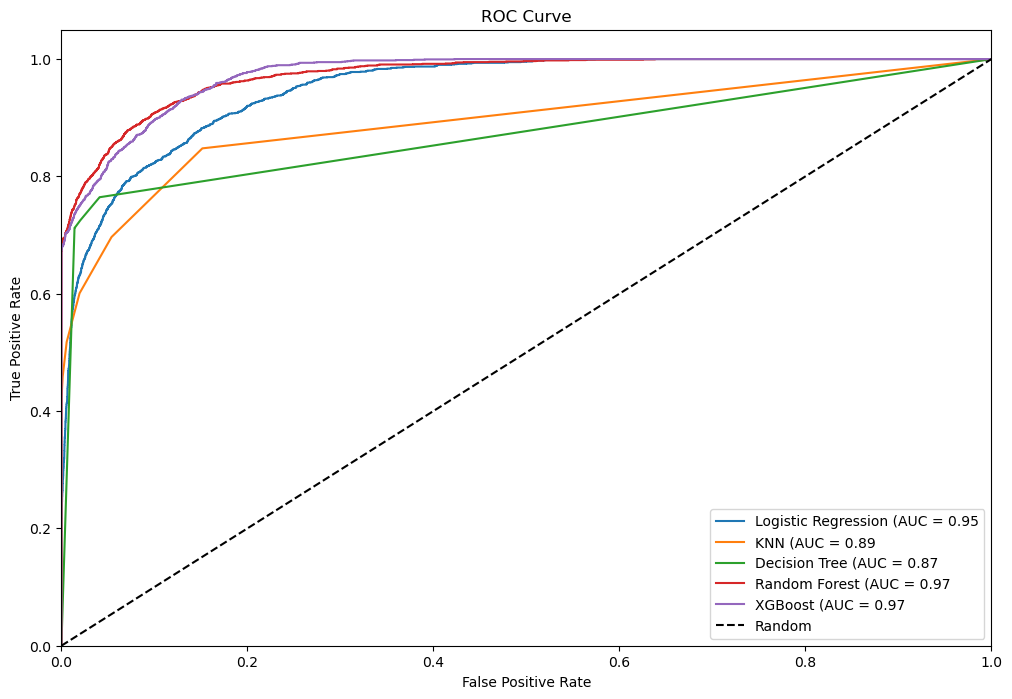

In [28]:
# Define a list of classifiers and their names excluding Linear Regression
classifiers = [logistic_model, best_estimator, dt_classifier, rf_classifier, xgb_classifier]
classifier_names = ["Logistic Regression", "KNN", "Decision Tree", "Random Forest", "XGBoost"]

# Create a function to plot ROC curve and calculate AUC
def plot_roc_curve_and_auc(classifiers, classifier_names, X_test, y_test):
    plt.figure(figsize=(12, 8))
    for classifier, name in zip(classifiers, classifier_names):
        if hasattr(classifier, 'predict_proba'):  # Check if the classifier has predict_proba method
            y_pred_prob = classifier.predict_proba(X_test)[:, 1]
        else:
            try:
                y_pred_prob = classifier.decision_function(X_test)
            except AttributeError:
                raise AttributeError(f"{name} does not have predict_proba or decision_function method.")

        fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
        auc = roc_auc_score(y_test, y_pred_prob)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f}")

    plt.plot([0, 1], [0, 1], 'k--', label="Random")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.show()

# Plot ROC curves and calculate AUC for classifiers excluding Linear Regression
plot_roc_curve_and_auc(classifiers, classifier_names, X_test, y_test)

In [29]:
# Create the CatBoost Classifier
xgb_classifier = XGBClassifier(random_state=42,max_features='sqrt', n_estimators=100, max_depth=10)
xgb_classifier.fit(X_train, y_train)
# Perform k-fold cross-validation
cv_scores = cross_val_score(xgb_classifier, X_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

c:\Users\pardh\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [01:17:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_features" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\pardh\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [01:17:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_features" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\pardh\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [01:17:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_features" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\pardh\anaconda3\Lib\site-packages\xgboost\core.py

Cross-Validation Scores: [0.96899376 0.96626146 0.96671651 0.96808165 0.96788663]
Mean Accuracy: 0.9675879998211044


In [30]:
# Select a random sample of 10 rows
random_sample = df_encoded.sample(n=10, random_state=42)

# Separate features (X) and target variable (y)
X_sample = random_sample.drop("diabetes", axis=1)
y_sample = random_sample["diabetes"]

# Load the best CatBoost model with the identified parameters
xgb_classifier = XGBClassifier(random_state=42,max_features='sqrt', n_estimators=100, max_depth=10)

# Fit the model to the entire training data using the best parameters
xgb_classifier.fit(X_train, y_train)

# Predict on the random sample
y_pred_sample = xgb_classifier.predict(X_sample)

# Display the predictions
predictions_df = pd.DataFrame({"Actual": y_sample, "Predicted": y_pred_sample})
print(predictions_df)

c:\Users\pardh\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [01:17:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_features" } are not used.

  warnings.warn(smsg, UserWarning)


       Actual  Predicted
2547        0          0
34774       0          0
71084       1          1
50584       0          0
80788       0          0
46976       0          0
69385       0          0
57772       0          0
87690       0          0
35032       0          0
